# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import numpy as np
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

load_dotenv()
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
news_api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en")

In [6]:
def create_sentiment_df(news):
    """
    Create sentiment dataframe from articles
    """
    df = pd.DataFrame.from_dict(news["articles"])

    # remove None
    df = df[df.content.notnull()]

    sent_df = df["content"].apply(lambda row: analyzer.polarity_scores(row)).apply(pd.Series)
    combined_df = pd.concat([sent_df, df["content"]], axis="columns")
    combined_df.columns = ["Negative", "Neutral", "Positive", "Compound", "Text"]

    return combined_df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_sentiment_df(btc_headlines)
btc_df.head()

,Negative,Neutral,Positive,Compound,Text
0,0.000,0.909,0.091,0.3182,Elon Musks cryptocurrency hype was more than j...
1,0.000,0.929,0.071,0.3818,"Tesla, led by Elon Musk, confirmed that it pur..."
2,0.038,0.962,0.000,-0.1027,"For a brief moment on Sunday, before Tesla sai..."
3,0.000,0.944,0.056,0.2500,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.000,0.863,0.137,0.6597,"Today in an SEC filing, Tesla disclosed that i..."


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_df = create_sentiment_df(eth_headlines)
eth_df.head()

,Negative,Neutral,Positive,Compound,Text
0,0.0,1.000,0.000,0.0000,Coinbase plans to go public by way of a direct...
1,0.0,1.000,0.000,0.0000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: Representation...
3,0.0,0.873,0.127,0.4939,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)..."
4,0.0,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: The logo of th...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Negative,Neutral,Positive,Compound
count,20.0000,20.000000,20.000000,20.000000
mean,0.0294,0.902400,0.068200,0.128870
std,0.0412,0.077779,0.083499,0.412035
min,0.0000,0.647000,0.000000,-0.557400
25%,0.0000,0.862250,0.000000,-0.109025
50%,0.0000,0.906500,0.053500,0.088950
75%,0.0575,0.946750,0.093500,0.391725
max,0.1140,1.000000,0.353000,0.921700


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Negative,Neutral,Positive,Compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.013250,0.952250,0.034500,0.095030
std,0.041747,0.059215,0.052211,0.310412
min,0.000000,0.833000,0.000000,-0.709600
25%,0.000000,0.918000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.076750,0.340000
max,0.160000,1.000000,0.167000,0.700300


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score (0.0682).

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score (0.9217).

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score (0.353).

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# import nltk
# nltk.download('stopwords')

sw = set(stopwords.words("english"))
regex = re.compile("[^a-zA-Z ]")

lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    lower_words = [word.lower() for word in words]
    
    # Remove the punctuation
    alpha_words = [regex.sub("", word) for word in lower_words]
    
    # Remove the stop words
    clean_words = [word for word in alpha_words if word not in sw and word]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in clean_words]
    
    return tokens


In [14]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df["Text"].apply(lambda txt: tokenizer(txt))
btc_df.head()

,Negative,Neutral,Positive,Compound,Text,tokens
0,0.000,0.909,0.091,0.3182,Elon Musks cryptocurrency hype was more than j...,"[elon, musk, cryptocurrency, hype, idle, talk,..."
1,0.000,0.929,0.071,0.3818,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,0.038,0.962,0.000,-0.1027,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.000,0.944,0.056,0.2500,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.000,0.863,0.137,0.6597,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, acquire..."


In [15]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df["Text"].apply(lambda txt: tokenizer(txt))
eth_df.head()

,Negative,Neutral,Positive,Compound,Text,tokens
0,0.0,1.000,0.000,0.0000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
1,0.0,1.000,0.000,0.0000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, staff, file, photo, representation, ..."
3,0.0,0.873,0.127,0.4939,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)...","[reuters, staff, singapore, feb, reuters, cryp..."
4,0.0,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: The logo of th...,"[reuters, staff, file, photo, logo, bitcoin, d..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = btc_df["tokens"].apply(lambda tokens: Counter(ngrams(tokens, n=2))).sum()
btc_ngrams.most_common(10)

[(('elon', 'musk'), 4),
 (('billion', 'bitcoin'), 3),
 (('jack', 'dorsey'), 2),
 (('jay', 'z'), 2),
 (('popular', 'cryptocurrency'), 2),
 (('bitcoin', 'future'), 2),
 (('feb', 'et'), 2),
 (('musk', 'cryptocurrency'), 1),
 (('cryptocurrency', 'hype'), 1),
 (('hype', 'idle'), 1)]

In [18]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = eth_df["tokens"].apply(lambda tokens: Counter(ngrams(tokens, n=2))).sum()
eth_ngrams.most_common(10)

[(('file', 'photo'), 8),
 (('reuters', 'staff'), 7),
 (('virtual', 'currency'), 6),
 (('photo', 'representation'), 5),
 (('staff', 'file'), 5),
 (('feb', 'reuters'), 5),
 (('record', 'high'), 4),
 (('job', 'data'), 4),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
btc_df["tokens"].apply(lambda tokens: Counter(tokens)).sum().most_common(10)

[('char', 20),
 ('bitcoin', 16),
 ('cryptocurrency', 8),
 ('tesla', 7),
 ('musk', 5),
 ('company', 5),
 ('elon', 4),
 ('billion', 4),
 ('said', 4),
 ('future', 3)]

In [21]:
# Get the top 10 words for Ethereum
eth_df["tokens"].apply(lambda tokens: Counter(tokens)).sum().most_common(10)

[('char', 20),
 ('reuters', 19),
 ('photo', 10),
 ('ethereum', 10),
 ('currency', 9),
 ('bitcoin', 9),
 ('file', 8),
 ('dollar', 8),
 ('staff', 7),
 ('virtual', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

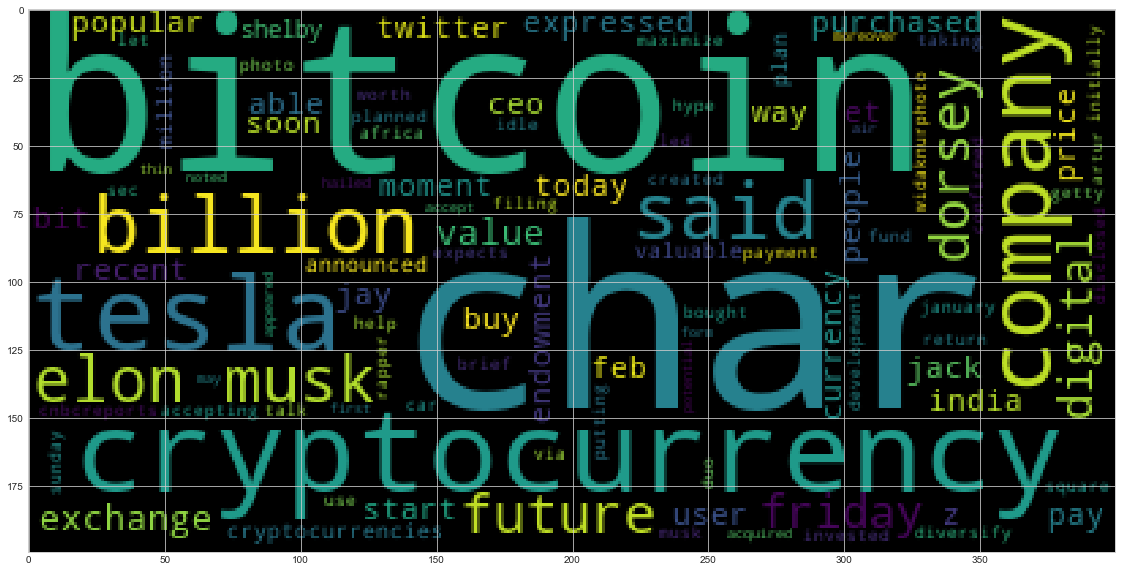

In [23]:
# Generate the Bitcoin word cloud
btc_input_text = " ".join(btc_df["tokens"].str.join(" ").values.tolist())
btc_wc = WordCloud(max_words=100).generate(btc_input_text)
plt.imshow(btc_wc)

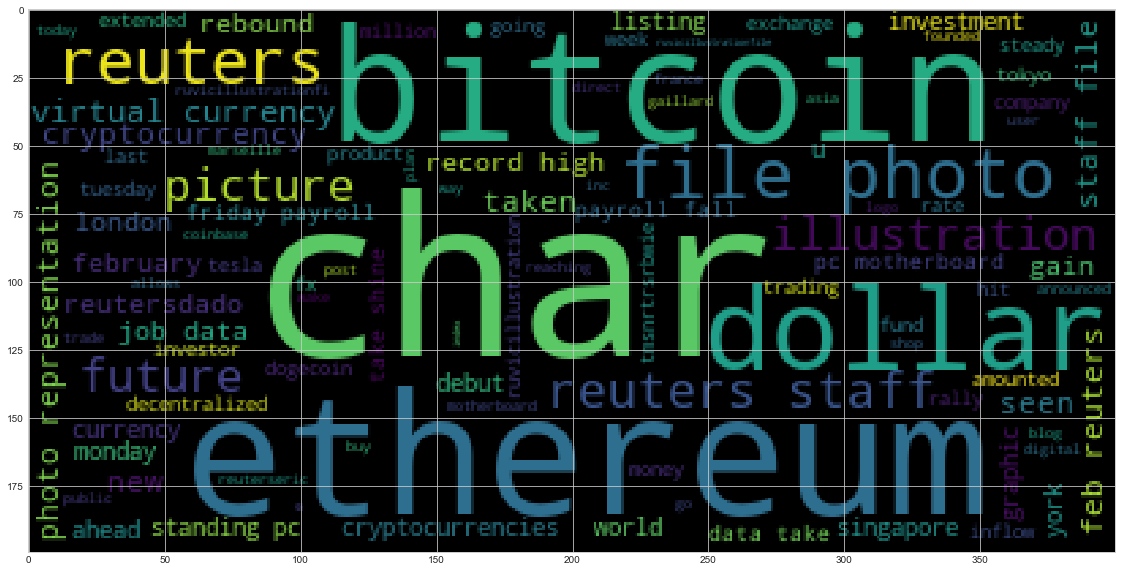

In [24]:
# Generate the Ethereum word cloud
eth_input_text = " ".join(eth_df["tokens"].str.join(" ").values.tolist())
eth_wc = WordCloud(max_words=100).generate(eth_input_text)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together
btc_text = " ".join(btc_df["Text"])

In [41]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [42]:
# Render the visualization
displacy.render(doc, style='ent')

In [43]:
# List all Entities
for ent in doc.ents:
    print(f"{ent.text} {ent.label_}")

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
Mt. Gox LOC
2014 DATE
Bitcoin exchange ORG
850,000 CARDINAL
thousands CARDINAL
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Bitcoin PERSON
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
Alabamas PERSON
Richa

---

## Ethereum NER

In [44]:
# Concatenate all of the bitcoin text together
eth_text = " ".join(eth_df["Text"])

In [45]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [47]:
# Render the visualization
displacy.render(eth_doc, style="ent")

In [48]:
# List all Entities
for ent in eth_doc.ents:
    print(f"{ent.text} {ent.label_}")

today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
NEW YORK GPE
Feb 8 DATE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
Friday DATE
World FX ORG
tmsnrt.rs/2RBWI5E PRODUCT
LONDON GPE
Feb 8(Reuters DATE
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration/File Photo
 ORG
SINGAPOR PERSON
Friday DATE
World FX ORG
tmsnrt.rs/2RBWI5E PRODUCT
LONDON GPE
Feb 